<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Data-Science-Core-Independent-Project-Wk-8/blob/main/Moringa_Data_Science_Core_Independent_Project_Wk_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We are going to use the following <a href=http://bit.ly/hypothyroid_data>data</a> to answer our research question.

##**Defining the research question**
To create a model that determines whether or not the  patient's symptoms indicate that the patient has hypothyroid.

##**Metric of Success**
Creating models that have a high percentage of accuracy in their prediction using the best parameters and they should also have a low RMSE.

##**Context**
Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism. Hypothyroidism is more common than you would believe, and millions of people are currently hypothyroid and don't know it.

##**Experimental Design taken**
* The experimental design to be undertaken to answer our research question is;
* Downloading the dataset and importing it into our colab notebook
* Importing the necessary libraries.
* Data Exploration.
* Data Cleaning.
* Performing Exploratory data analysis.
* Creating a decision tree
* Modelling - Random forests
          - Ada boosted trees
          - Gradient boosted trees
          - Support Vector machine
* Challenging the solution 
* Making conclusions

##**Appropriateness of the data**
The data provided is appropriate for our analysis and modelling since it contains features that are important in determining if a patient is hypothyroid or not.


##**Reading the data**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix


#reading the dataset
#viewing the first 5 rows of the dataset
data = pd.read_csv('hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [2]:
#checking the shape of the dataset
data.shape

(3163, 26)

In [3]:
#checking the dataset's columns
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [4]:
#checking for the dataset's description
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [5]:
#checking for the datasets information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

##**Tidying the dataset**

**Data Completeness**

In [6]:
#Checking for missing data
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
#checking for unique values in the dataset
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [8]:
#checking for the number of missing values in the age column
len(data.loc[(data['age'] == '?')])

446

In [9]:
#checking for the number of missing values in the T3 column
len(data.loc[(data['T3'] == '?')])


695

In [10]:
#checking for the number of missing values in the TSH column
len(data.loc[(data['TSH'] == '?')])


468

In [11]:
#checking for the number of missing values in the TT4 column
len(data.loc[(data['TT4'] == '?')])


249

In [12]:
#checking for the number of missing values in the sex column
#dealing with missing values
len(data.loc[(data['sex'] == '?')])

73

In [13]:
#checking for the number of missing values in the TBG column
#dealing with missing values
len(data.loc[(data['TBG'] == '?')])


2903

In [14]:
#checking for the number of missing values in the age column
len(data.loc[(data['age'] == '?')])

446

In [15]:
#replacing ? with None so as to identify the null values and deal with them separately
data.replace({'?' : None}, inplace = True)

In [16]:
#Checking the number of missing values in the dataset after replacing ? with None.
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [17]:
#Changing the column's data types and assigning the right ones
data['T3'] = pd.to_numeric(data['T3'],errors = 'coerce')
data['TT4'] = pd.to_numeric(data['TT4'],errors = 'coerce')
data['T4U'] = pd.to_numeric(data['T4U'],errors = 'coerce')
data['TSH'] = pd.to_numeric(data['TSH'],errors = 'coerce')
data['FTI'] = pd.to_numeric(data['FTI'],errors = 'coerce')
data['TBG'] = pd.to_numeric(data['TBG'],errors = 'coerce')
data['age'] = pd.to_numeric(data['age'],errors = 'coerce')

In [18]:
#Dealing with missing values
#Imputing the T3, TSH, and TT4 columns with mean

data['T3'] = data['T3'].fillna(data['T3'].mean())
data['TSH'] = data['TSH'].fillna(data['TSH'].mean())
data['TT4'] = data['TT4'].fillna(data['TT4'].mean())
data['T4U'] = data['T4U'].fillna(data['T4U'].mean())
data['FTI'] = data['FTI'].fillna(data['FTI'].mean())
data['age'] = data['age'].fillna(data['age'].mean())
data['TBG'] = data['TBG'].fillna(data['TBG'].mean())

In [19]:
#Dealing with missing values in the sex column
data['sex'].fillna(method='ffill', inplace=True)

In [20]:
#Confirming to see if the missing values have been inputed
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [21]:
#Checking the column data types
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [22]:
#checking if all values in the age column are integers
data.age.apply(float.is_integer).all()

False

In [23]:
#Checking the unique values in the age column
data['age'].unique()

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

In [24]:
#checking the data types of the dataset's columns
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

**Data Consistency**

In [25]:
#checking for duplicates
#dropping any duplicates
data.duplicated().sum()
data_clean =data.drop_duplicates()
data_clean.shape

(3086, 26)

**Data Validity**

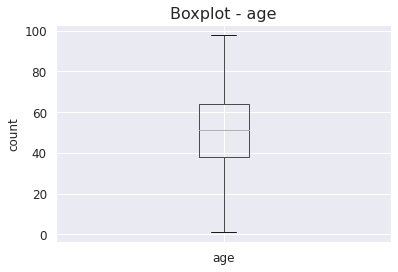

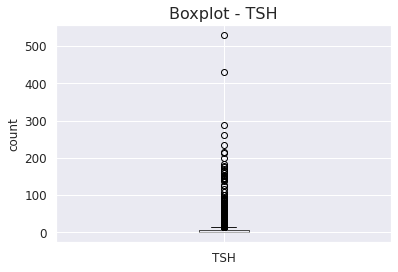

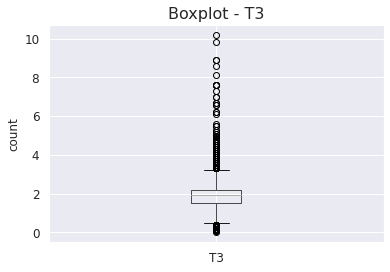

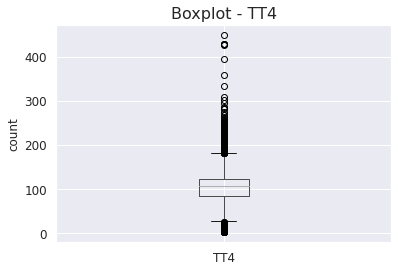

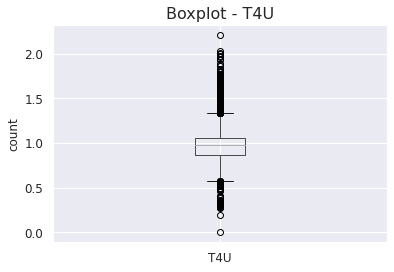

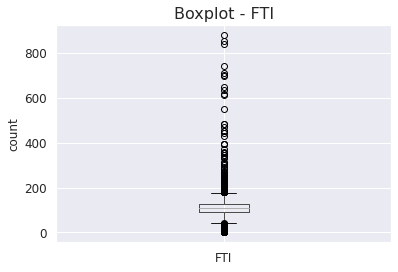

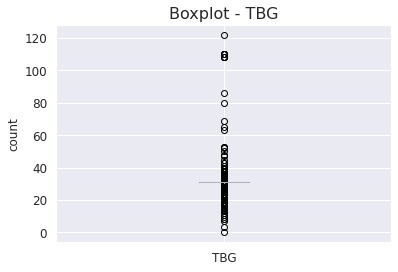

In [26]:
#Checking for Outliers
cols = ['age','TSH', 'T3', 'TT4','T4U', 'FTI', 'TBG']

for column in cols:
    plt.figure()
    data_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

In [27]:
# Checking for any anomalies in the qualitative variables

qcol = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

for col in qcol:
  print(col, ':', data_clean[col].unique())

status : ['hypothyroid' 'negative']
sex : ['M' 'F']
on_thyroxine : ['f' 't']
query_on_thyroxine : ['f' 't']
on_antithyroid_medication : ['f' 't']
thyroid_surgery : ['f' 't']
query_hypothyroid : ['f' 't']
query_hyperthyroid : ['f' 't']
pregnant : ['f' 't']
sick : ['f' 't']
tumor : ['f' 't']
lithium : ['f' 't']
goitre : ['f' 't']
TSH_measured : ['y' 'n']
T3_measured : ['y' 'n']
TT4_measured : ['y' 'n']
T4U_measured : ['y' 'n']
FTI_measured : ['y' 'n']
TBG_measured : ['n' 'y']


In [28]:
#Dropping the TBG column and TBG_measured column since they have so many missing values
data_clean = data_clean.drop(['TBG', 'TBG_measured'], axis = 1)
data_clean.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0


##**Exploratory data analysis**

###**Univariate Analysis**

In [29]:
#Checking the column names
data_clean.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

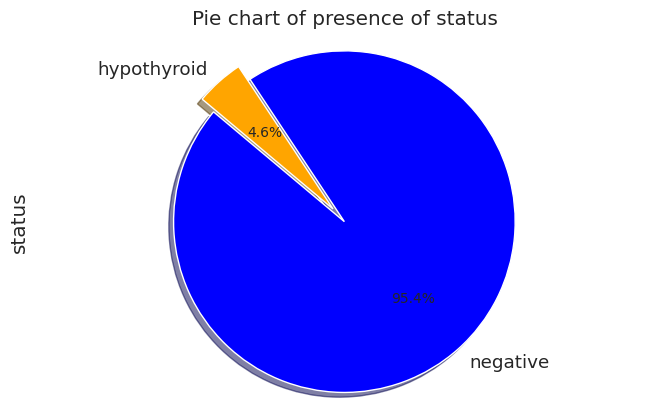

In [30]:
# Pie Chart for status

status = data_clean.status.value_counts()
plt.figure(figsize= (8,5), dpi=100)

# Highlighting yes
explode = (0.1, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
status.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie chart of presence of status')
plt.show()

95.4% of the patients do not have hypothyroid.

In [31]:
# Frequency table for sex in percentage

round(data_clean.sex.value_counts(normalize = True),2)

F    0.7
M    0.3
Name: sex, dtype: float64

Most of the patients are female

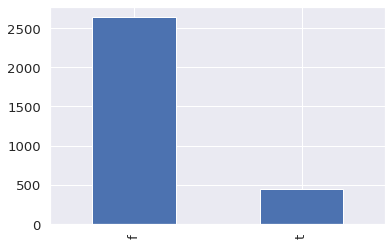

In [32]:
#A bar chart to show on_thyroxine
data_clean['on_thyroxine'].value_counts().plot.bar()

Most of the patients are not on thyroxine.

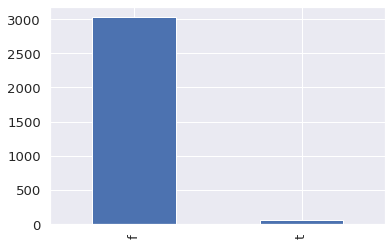

In [33]:
#A bar chart to show query_on_thyroxine
data_clean['query_on_thyroxine'].value_counts().plot.bar()

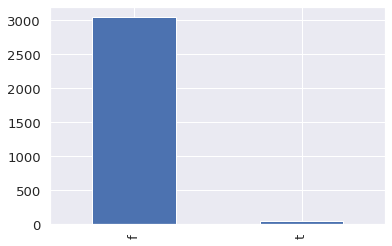

In [34]:
#A bar chart to show on_antithyroid_medication
data_clean['on_antithyroid_medication'].value_counts().plot.bar()

Most of the patients are not on antithyroid medication

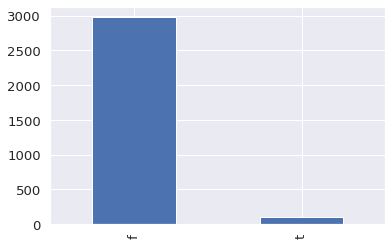

In [35]:
#A bar chart to show thyroid_surgery
data_clean['thyroid_surgery'].value_counts().plot.bar()

Most patients have not undergone the thyroid surgery.

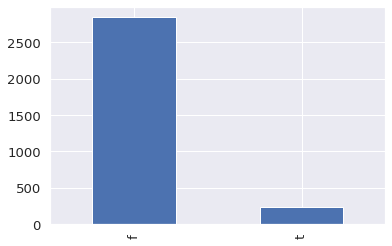

In [36]:
#A bar chart to show query_hypothyroid
data_clean['query_hypothyroid'].value_counts().plot.bar()

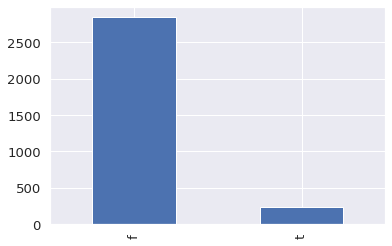

In [37]:
#A bar chart to show query_hyperthyroid
data_clean['query_hyperthyroid'].value_counts().plot.bar()

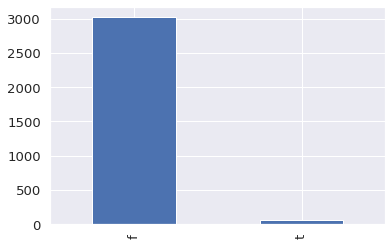

In [38]:
#A bar chart to show pregnant
data_clean['pregnant'].value_counts().plot.bar()

Most of the patients are not pregnant

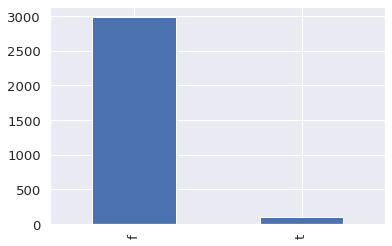

In [39]:
#A bar chart to show sick column
data_clean['sick'].value_counts().plot.bar()

Most of the patients do not have hypothyroid

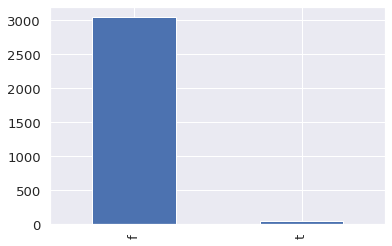

In [40]:
#A bar chart to show tumor
data_clean['tumor'].value_counts().plot.bar()

Most patients do not have a tumor

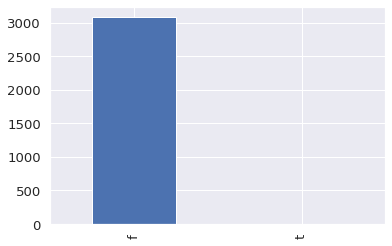

In [41]:
#A bar chart to show lithium
data_clean['lithium'].value_counts().plot.bar()

Most patients are notusing lithium medication

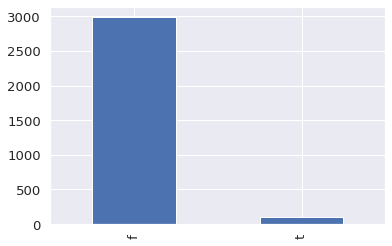

In [42]:
#A bar chart to show goitre
data_clean['goitre'].value_counts().plot.bar()

Most patients do not have goitre

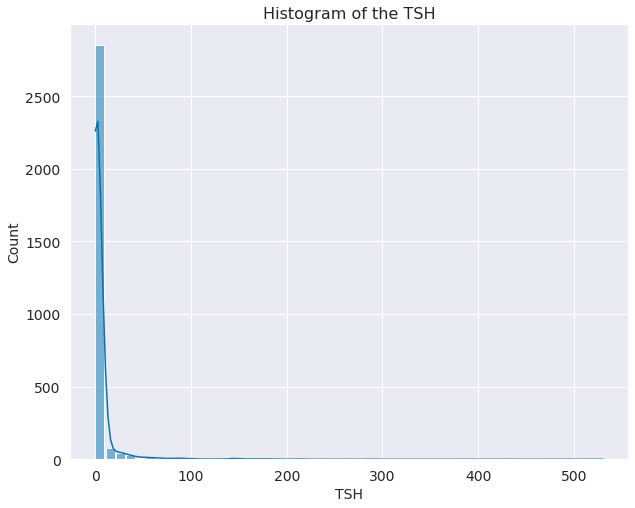

In [43]:
# Histogram for the TSH column
def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=data_clean,  bins = bins , shrink= 0.9, kde = True)

histogram('TSH', 50)

plt.title('Histogram of the TSH', fontsize = 16)
plt.xlabel('TSH', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

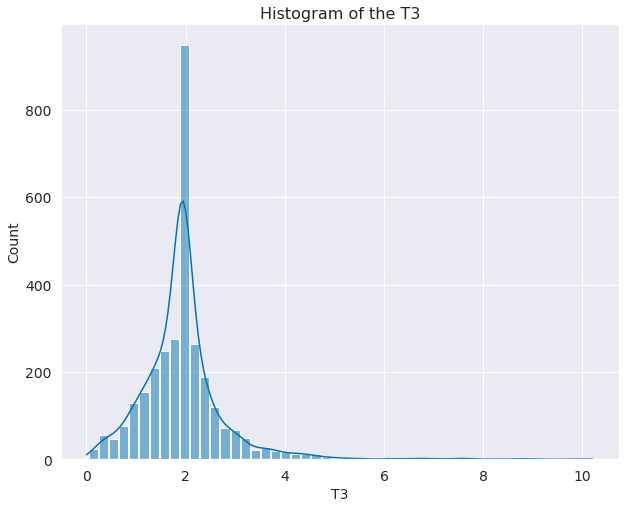

In [44]:
# A histogram representing the T3 column
histogram('T3', 50)

plt.title('Histogram of the T3', fontsize = 16)
plt.xlabel('T3', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

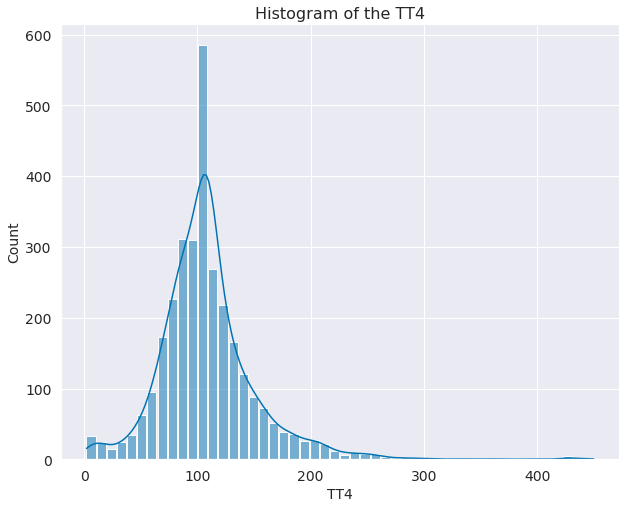

In [45]:
# A histogram representing the TT4 column
histogram('TT4', 50)

plt.title('Histogram of the TT4', fontsize = 16)
plt.xlabel('TT4', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

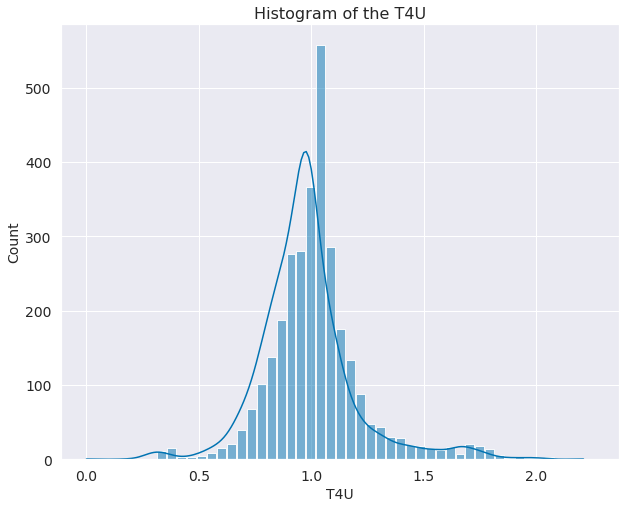

In [46]:
# A histogram representing the T4U column
histogram('T4U', 50)

plt.title('Histogram of the T4U', fontsize = 16)
plt.xlabel('T4U', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

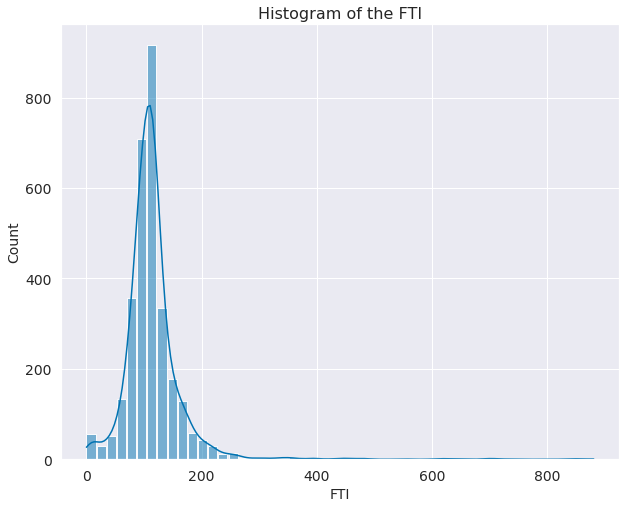

In [47]:
# A histogram representing the FTI column
histogram('FTI', 50)

plt.title('Histogram of the FTI', fontsize = 16)
plt.xlabel('FTI', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

####**Measures of central tendency and measures of dispersion**

In [48]:
#checking the measures of central tendency
data_clean.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.118453,5.826107,1.935006,108.718049,0.977608,115.482038
std,17.854437,22.181031,0.864830,42.836488,0.216873,57.780972
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [49]:
#Checking the kurtosis of numerical variables in the dataset
data_clean.kurt()

age     -0.621211
TSH    180.678222
T3      14.875539
TT4      7.677963
T4U      3.970052
FTI     52.802477
dtype: float64

In [50]:
#Checking for the skewness of the numerical variables
data_clean.skew()

age    -0.184273
TSH    11.143129
T3      2.449086
TT4     1.527621
T4U     0.990602
FTI     5.425619
dtype: float64

###**Bivariate analysis**

In [51]:
#checking how the numerical variables are correlated to one another
data_clean.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007727,-0.266268,-0.086443,-0.188983,0.017901
TSH,-0.007727,1.000000,-0.169662,-0.309020,0.072491,-0.240040
T3,-0.266268,-0.169662,1.000000,0.534040,0.386510,0.281657
TT4,-0.086443,-0.309020,0.534040,1.000000,0.320417,0.677343
T4U,-0.188983,0.072491,0.386510,0.320417,1.000000,-0.294438
FTI,0.017901,-0.240040,0.281657,0.677343,-0.294438,1.000000


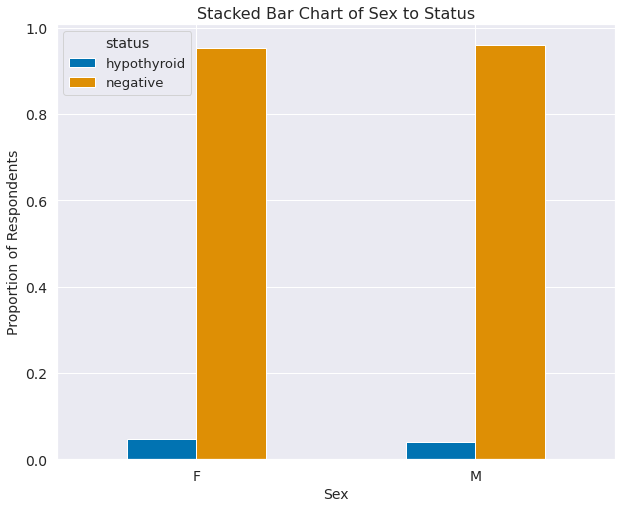

In [52]:
# Comparison of Sex and Status 

table=pd.crosstab(data_clean['sex'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of Sex to Status', fontsize = 16)
plt.xlabel('Sex', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

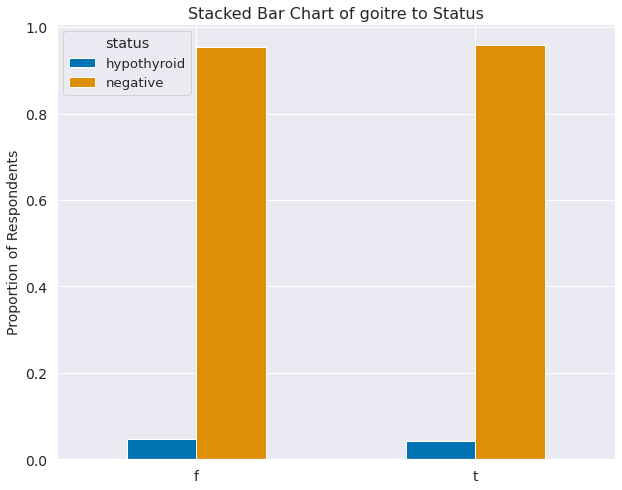

In [53]:
# Comparison of goitre and Status 

table=pd.crosstab(data_clean['goitre'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of goitre to Status', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

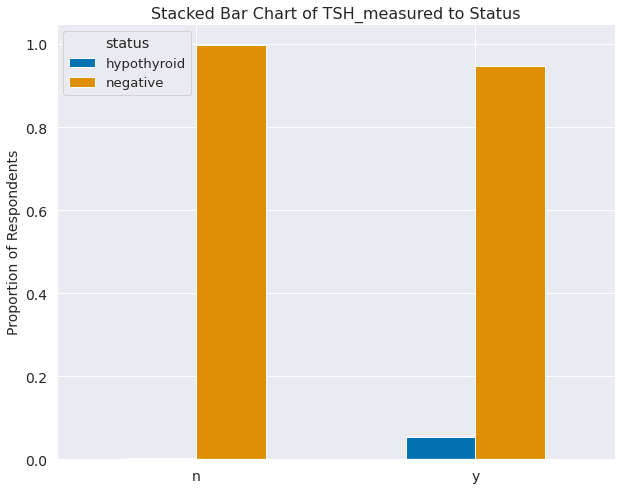

In [54]:
# Comparison of TSH_measured and Status 

table=pd.crosstab(data_clean['TSH_measured'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of TSH_measured to Status', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

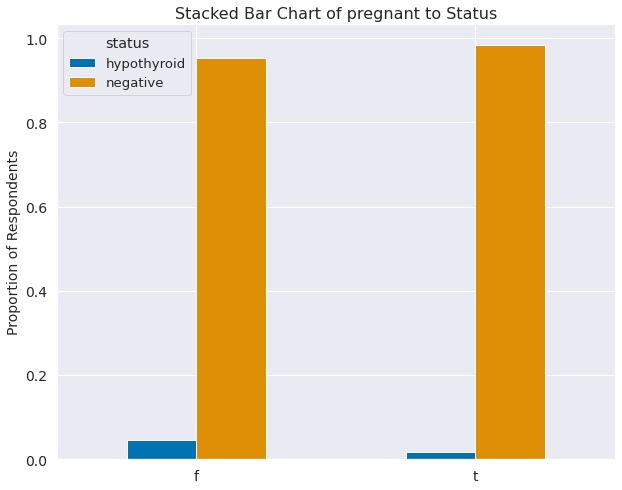

In [55]:
# Comparison of pregnant and Status 

table=pd.crosstab(data_clean['pregnant'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of pregnant to Status', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

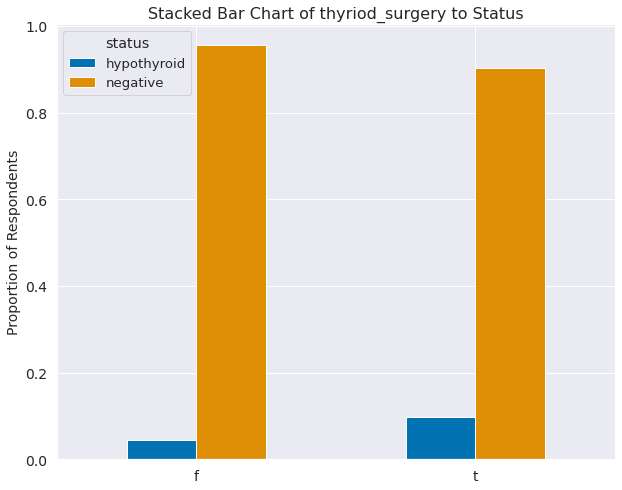

In [56]:
# Comparison of thyriod_surgery and Status 

table=pd.crosstab(data_clean['thyroid_surgery'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of thyriod_surgery to Status', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

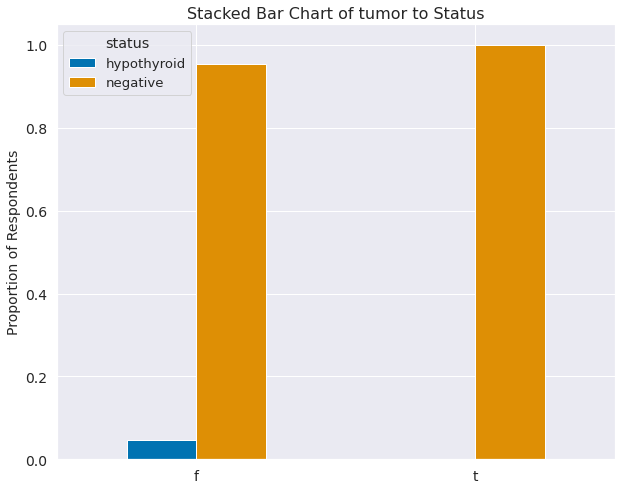

In [57]:
# Comparison of tumor and Status 

table=pd.crosstab(data_clean['tumor'],data_clean['status'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize= (10,8), stacked=False)
plt.title('Stacked Bar Chart of tumor to Status', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Proportion of Respondents', fontsize = 14)
plt.xticks(rotation = 360, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

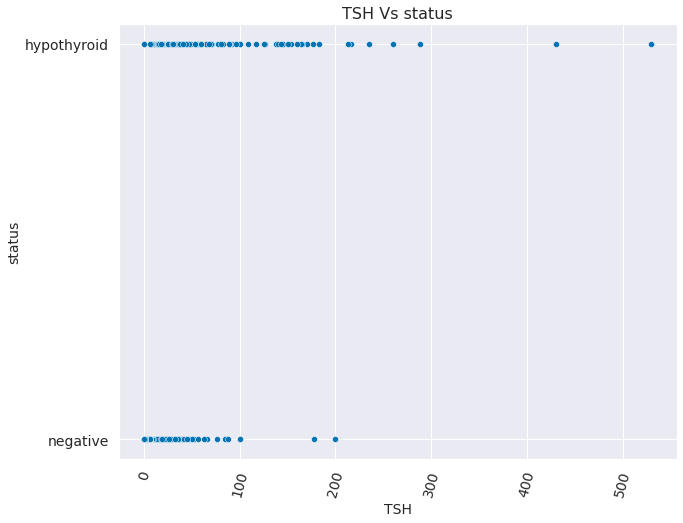

In [58]:
#A scatter plot that shows the relationship between TSH and status
plt.figure(figsize= (10,8))
sns.scatterplot(x= data_clean.TSH, y = data_clean.status)
plt.title('TSH Vs status', fontsize = 16)
plt.ylabel('status', fontsize=14)
plt.xlabel('TSH', fontsize=14)
plt.xticks(rotation = 75, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

###**Multivariate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


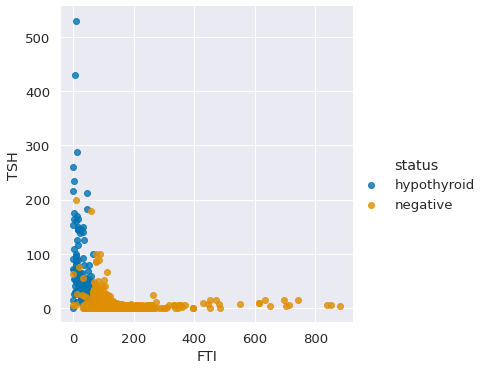

In [59]:
#A scatter plot that shows the relationship between FTI,TSH and status
sns.lmplot("FTI", "TSH", data_clean, hue="status", fit_reg=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


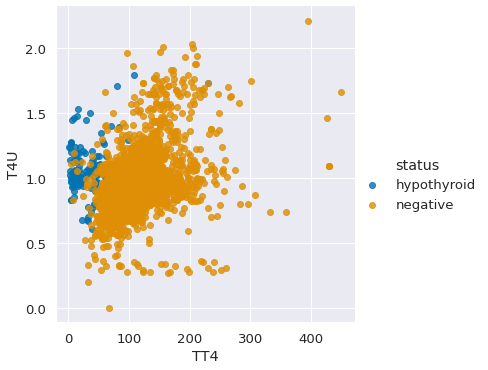

In [60]:
#A scatter plot that shows the relationship between TT4, T4U and status
sns.lmplot("TT4", "T4U", data_clean, hue="status", fit_reg=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


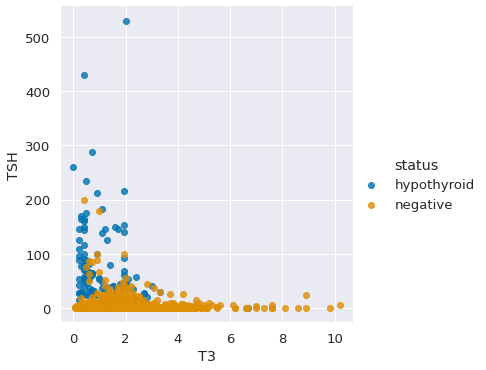

In [61]:
#A scatter plot that shows the relationship between T3,TSH and status
sns.lmplot("T3", "TSH", data_clean, hue="status", fit_reg=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


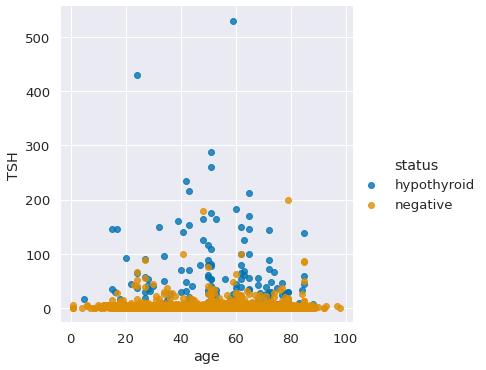

In [62]:
#A scatter plot that shows the relationship between age,TSH and status
sns.lmplot("age", "TSH", data_clean, hue="status", fit_reg=False);

In [63]:
#Encoding variables so that we can check their correlation
dummy_status = pd.get_dummies(data['status'], prefix = 'status')
dummy_sex = pd.get_dummies(data['sex'], prefix = "sex")
dummy_on_thyroxine = pd.get_dummies(data['on_thyroxine'], prefix = "on_thyroxine")
dummy_query_on_thyroxine = pd.get_dummies(data['query_on_thyroxine'], prefix = "query_on_thyroxine")
dummy_on_antithyroid_medication = pd.get_dummies(data['on_antithyroid_medication'], prefix = "on_antithyroid_medication")
dummy_thyroid_surgery = pd.get_dummies(data['thyroid_surgery'], prefix = "thyroid_surgery")
dummy_query_hyperthyroid= pd.get_dummies(data['query_hyperthyroid'], prefix = "query_hyperthyroid")
dummy_query_hypothyroid= pd.get_dummies(data['query_hypothyroid'], prefix = "query_hypothyroid")
dummy_pregnant= pd.get_dummies(data['pregnant'], prefix = "pregnant")
dummy_sick= pd.get_dummies(data['sick'], prefix = "sick")
dummy_tumor= pd.get_dummies(data['tumor'], prefix = "tumor")
dummy_goitre= pd.get_dummies(data['goitre'], prefix = "goitre")
dummy_TSH_measured	= pd.get_dummies(data['TSH_measured'], prefix = "TSH_measured")
dummy_T3_measured	= pd.get_dummies(data['T3_measured'], prefix = "T3_measured")
dummy_TT4_measured	= pd.get_dummies(data['TT4_measured'], prefix = "TT4_measured")
dummy_T4U_measured	= pd.get_dummies(data['T4U_measured'], prefix = "T4U_measured")
dummy_FTI_measured	= pd.get_dummies(data['FTI_measured'], prefix = "FTI_measured")
dummy_TBG_measured	= pd.get_dummies(data['TBG_measured'], prefix = "TBG_measured")

In [64]:
frames = [data,dummy_status,dummy_sex,dummy_on_thyroxine,dummy_query_on_thyroxine,dummy_on_antithyroid_medication,dummy_thyroid_surgery,dummy_query_hyperthyroid,dummy_query_hypothyroid,dummy_pregnant,dummy_sick,dummy_tumor,dummy_goitre,dummy_TSH_measured,dummy_T3_measured,dummy_TT4_measured,dummy_T4U_measured,dummy_FTI_measured,dummy_TBG_measured]


In [65]:
data_train = pd.concat(frames, axis = 1)
data_train.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,status_hypothyroid,status_negative,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hyperthyroid_f,query_hyperthyroid_t,query_hypothyroid_f,query_hypothyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,31.283077,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,31.283077,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,31.283077,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [66]:
data_train.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'status_hypothyroid', 'status_negative', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hyperthyroid_f', 'query_hyperthyroid_t', 'query_hypothyroid_f',
       'query_hypothyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'goitre_f', 'goitre_t', 'TSH_measured_n',
       'TSH_measured_y', 'T3_measured_n', 'T3_measured_y', 'TT4_measured_n',
       'TT4_measured_y', 'T4U_measured_n', 'T4U

In [67]:
#Dropping unnecessary columns
data_train = data_train.drop(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured','T3_measured','TT4_measured', 
       'T4U_measured', 'FTI_measured', 'TBG_measured'], axis = 1)

In [68]:
#Checking how various variables are correlated with each other
data_train.corr()

,TSH,T3,TT4,T4U,FTI,TBG,status_hypothyroid,status_negative,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hyperthyroid_f,query_hyperthyroid_t,query_hypothyroid_f,query_hypothyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
TSH,1.000000e+00,-1.716474e-01,-3.095646e-01,6.899334e-02,-2.441455e-01,-1.377684e-03,0.582010,-0.582010,0.035281,-0.035281,0.003148,-0.003148,1.495940e-02,-1.495940e-02,0.001494,-0.001494,-0.011183,0.011183,0.024922,-0.024922,-0.066286,0.066286,0.013932,-0.013932,0.007624,-0.007624,0.019547,-0.019547,0.015887,-0.015887,-4.430578e-16,4.362989e-16,-5.131072e-03,5.131072e-03,-3.152630e-04,3.152630e-04,-3.158438e-04,3.158438e-04,-3.164283e-04,3.164283e-04,-4.622833e-03,4.622833e-03
T3,-1.716474e-01,1.000000e+00,5.453309e-01,3.880427e-01,2.939119e-01,1.966333e-02,-0.186543,0.186543,0.072358,-0.072358,-0.018801,0.018801,1.514719e-02,-1.514719e-02,-0.063089,0.063089,0.008659,-0.008659,-0.188833,0.188833,0.042905,-0.042905,-0.201306,0.201306,0.100294,-0.100294,-0.025094,0.025094,-0.087650,0.087650,4.324908e-02,-4.324908e-02,-1.846349e-16,1.957061e-16,-9.865257e-04,9.865257e-04,-9.883431e-04,9.883431e-04,-9.901719e-04,9.901719e-04,1.567418e-03,-1.567418e-03
TT4,-3.095646e-01,5.453309e-01,1.000000e+00,3.228259e-01,6.848721e-01,2.568318e-02,-0.376579,0.376579,0.164310,-0.164310,-0.214168,0.214168,2.009985e-02,-2.009985e-02,0.002968,-0.002968,0.017646,-0.017646,-0.150607,0.150607,0.014915,-0.014915,-0.165402,0.165402,0.041733,-0.041733,0.014603,-0.014603,-0.040543,0.040543,2.007243e-02,-2.007243e-02,6.782828e-02,-6.782828e-02,1.824614e-16,-1.636026e-16,9.870373e-17,-5.225351e-17,1.782568e-16,-1.875832e-16,-3.598077e-03,3.598077e-03
T4U,6.899334e-02,3.880427e-01,3.228259e-01,1.000000e+00,-2.832527e-01,2.647094e-02,0.081150,-0.081150,0.219644,-0.219644,-0.071925,0.071925,3.459826e-02,-3.459826e-02,-0.025797,0.025797,-0.024006,0.024006,-0.071976,0.071976,-0.035266,0.035266,-0.324259,0.324259,0.047898,-0.047898,-0.024048,0.024048,-0.069716,0.069716,-9.384068e-03,9.384068e-03,2.291519e-02,-2.291519e-02,9.813771e-04,-9.813771e-04,-2.733904e-15,2.697578e-15,-2.608727e-15,2.608239e-15,-5.945843e-03,5.945843e-03
FTI,-2.441455e-01,2.939119e-01,6.848721e-01,-2.832527e-01,1.000000e+00,8.822400e-04,-0.316258,0.316258,0.032160,-0.032160,-0.113521,0.113521,4.386403e-03,-4.386403e-03,0.017410,-0.017410,0.026322,-0.026322,-0.077633,0.077633,0.046753,-0.046753,0.007124,-0.007124,0.023051,-0.023051,0.026445,-0.026445,0.000158,-0.000158,3.662561e-02,-3.662561e-02,4.891703e-02,-4.891703e-02,-1.498077e-03,1.498077e-03,-9.843027e-04,9.843027e-04,4.790274e-17,-2.697357e-17,1.953986e-03,-1.953986e-03
TBG,-1.377684e-03,1.966333e-02,2.568318e-02,2.647094e-02,8.822400e-04,1.000000e+00,-0.001038,0.001038,0.041049,-0.041049,0.010097,-0.010097,9.278308e-17,-9.358848e-17,0.011681,-0.011681,0.019331,-0.019331,-0.002340,0.002340,0.012246,-0.012246,-0.084974,0.084974,-0.003020,0.003020,0.001174,-0.001174,0.011297,-0.011297,-9.320629e-03,9.320629e-03,-7.992498e-03,7.992498e-03,1.574900e-03,-1.574900e-03,1.577801e-03,-1.577801e-03,1.580721e-03,-1.580721e-03,8.693185e-16,-8.693185e-16
status_hypothyroid,5.820097e-01,-1.865430e-01,-3.765792e-01,8.114960e-02,-3.162585e-01,-1.037526e-03,1.000000,-1.000000,0.020673,-0.020673,0.033652,-0.033652,2.978529e-02,-2.978529e-02,0.013020,-0.013020,-0.041868,0.041868,0.025616,-0.025616,-0.047477,0.047477,0.021306,-0.021306,0.023216,-0.023216,0.025340,-0.025340,-0.010847,0.010847,-8.912872e-02,8.912872e-02,-6.868200e-02,6.868200e-02,-6.545094e-02,6.545094e-02,-6.530818e-02,6.530818e-02,-6.516520e-02,6.516520e-02,5.081212e-02,-5.081212e-02
status_negative,-5.820097e-01,1.865430e-01,3.76

##**Decision trees**

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data_train['status_hypothyroid'].values

test_features = ['TSH','T4U',
       'sex_F', 'on_thyroxine_f',
       'query_on_thyroxine_f',
       'on_antithyroid_medication_f',
      'thyroid_surgery_t', 'query_hyperthyroid_f',
         'query_hypothyroid_t',
       'pregnant_f',  'sick_f', 'sick_t', 'tumor_f',
       'goitre_f', 'goitre_t', 'TSH_measured_y',
       'T3_measured_y', 'TT4_measured_y', 'TSH',
       'T4U_measured_y', 'T4U', 'FTI_measured_y', 'FTI', 'T3', 'TT4']
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data_train[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


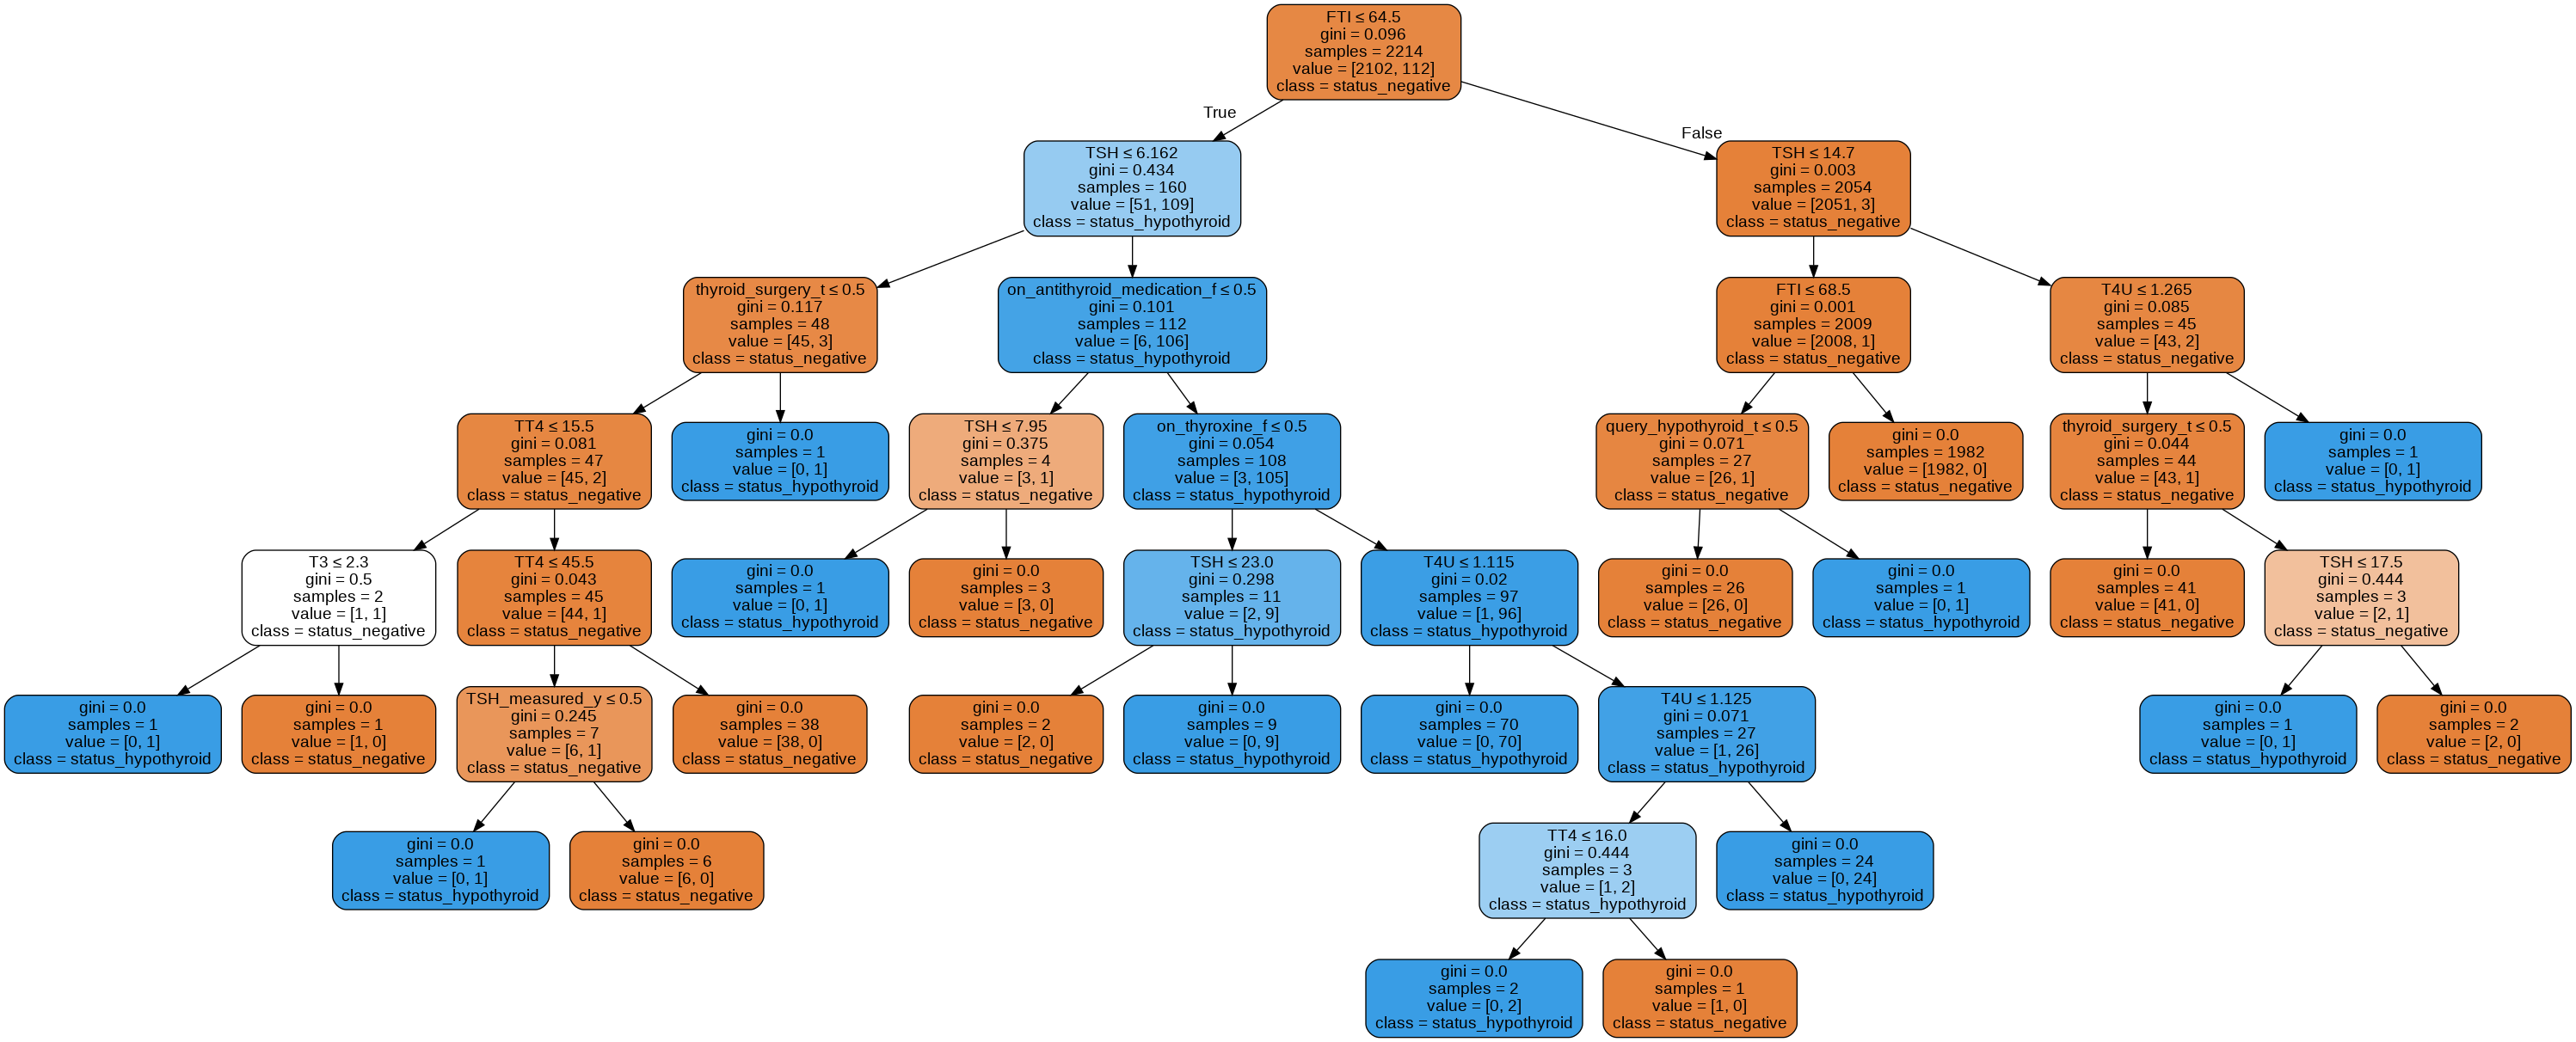

In [70]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['status_negative', 'status_hypothyroid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('status_hypothyroid')
Image(graph.create_png())

###**Random Forests**

In [71]:
data_train.columns

Index(['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'status_hypothyroid',
       'status_negative', 'sex_F', 'sex_M', 'on_thyroxine_f', 'on_thyroxine_t',
       'query_on_thyroxine_f', 'query_on_thyroxine_t',
       'on_antithyroid_medication_f', 'on_antithyroid_medication_t',
       'thyroid_surgery_f', 'thyroid_surgery_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'query_hypothyroid_f', 'query_hypothyroid_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'goitre_f', 'goitre_t', 'TSH_measured_n', 'TSH_measured_y',
       'T3_measured_n', 'T3_measured_y', 'TT4_measured_n', 'TT4_measured_y',
       'T4U_measured_n', 'T4U_measured_y', 'FTI_measured_n', 'FTI_measured_y',
       'TBG_measured_n', 'TBG_measured_y'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data_train['status_hypothyroid'].values


test_features = ['TSH','T4U',
       'sex_F', 'on_thyroxine_f',
       'query_on_thyroxine_f',
       'on_antithyroid_medication_f',
      'thyroid_surgery_t', 'query_hyperthyroid_f',
         'query_hypothyroid_t',
       'pregnant_f',  'sick_f', 'sick_t', 'tumor_f',
       'goitre_f', 'goitre_t', 'TSH_measured_y',
       'T3_measured_y', 'TT4_measured_y', 'TSH',
       'T4U_measured_y', 'T4U', 'FTI_measured_y', 'FTI', 'T3', 'TT4']


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data_train[test_features].values

In [73]:
#Training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
#importing the model
from sklearn.ensemble import RandomForestClassifier

fore = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)
fore = fore.fit(X_train, y_train)

In [75]:
# Predict based on the model we've trained
y_pred = fore.predict(X_test)
y_pred_train = fore.predict(X_train)

y_test.shape
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.041096,0.036881
std,0.198617,0.188569
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [76]:
# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, fore.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))


Prediction accuracy: 0.994579945799458
Test accuracy: 0.9852476290832455


In [77]:
# Hyperparameter tuning

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

search = GridSearchCV(estimator = fore, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [78]:
# Getting the best parameters and best score

search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.9923219599690188


In [79]:
#fitting the best parameters
from sklearn.ensemble import RandomForestClassifier

fore = RandomForestClassifier(min_samples_leaf = 3,  min_samples_split = 3, max_depth=7)
fore = fore.fit(X_train, y_train)

# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, fore.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.9950316169828365
Test accuracy: 0.9852476290832455


In [80]:
#Checking the error
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4236037934668073
Mean Squared Error: 0.014752370916754479
Root Mean Squared Error: 0.1214593385325084


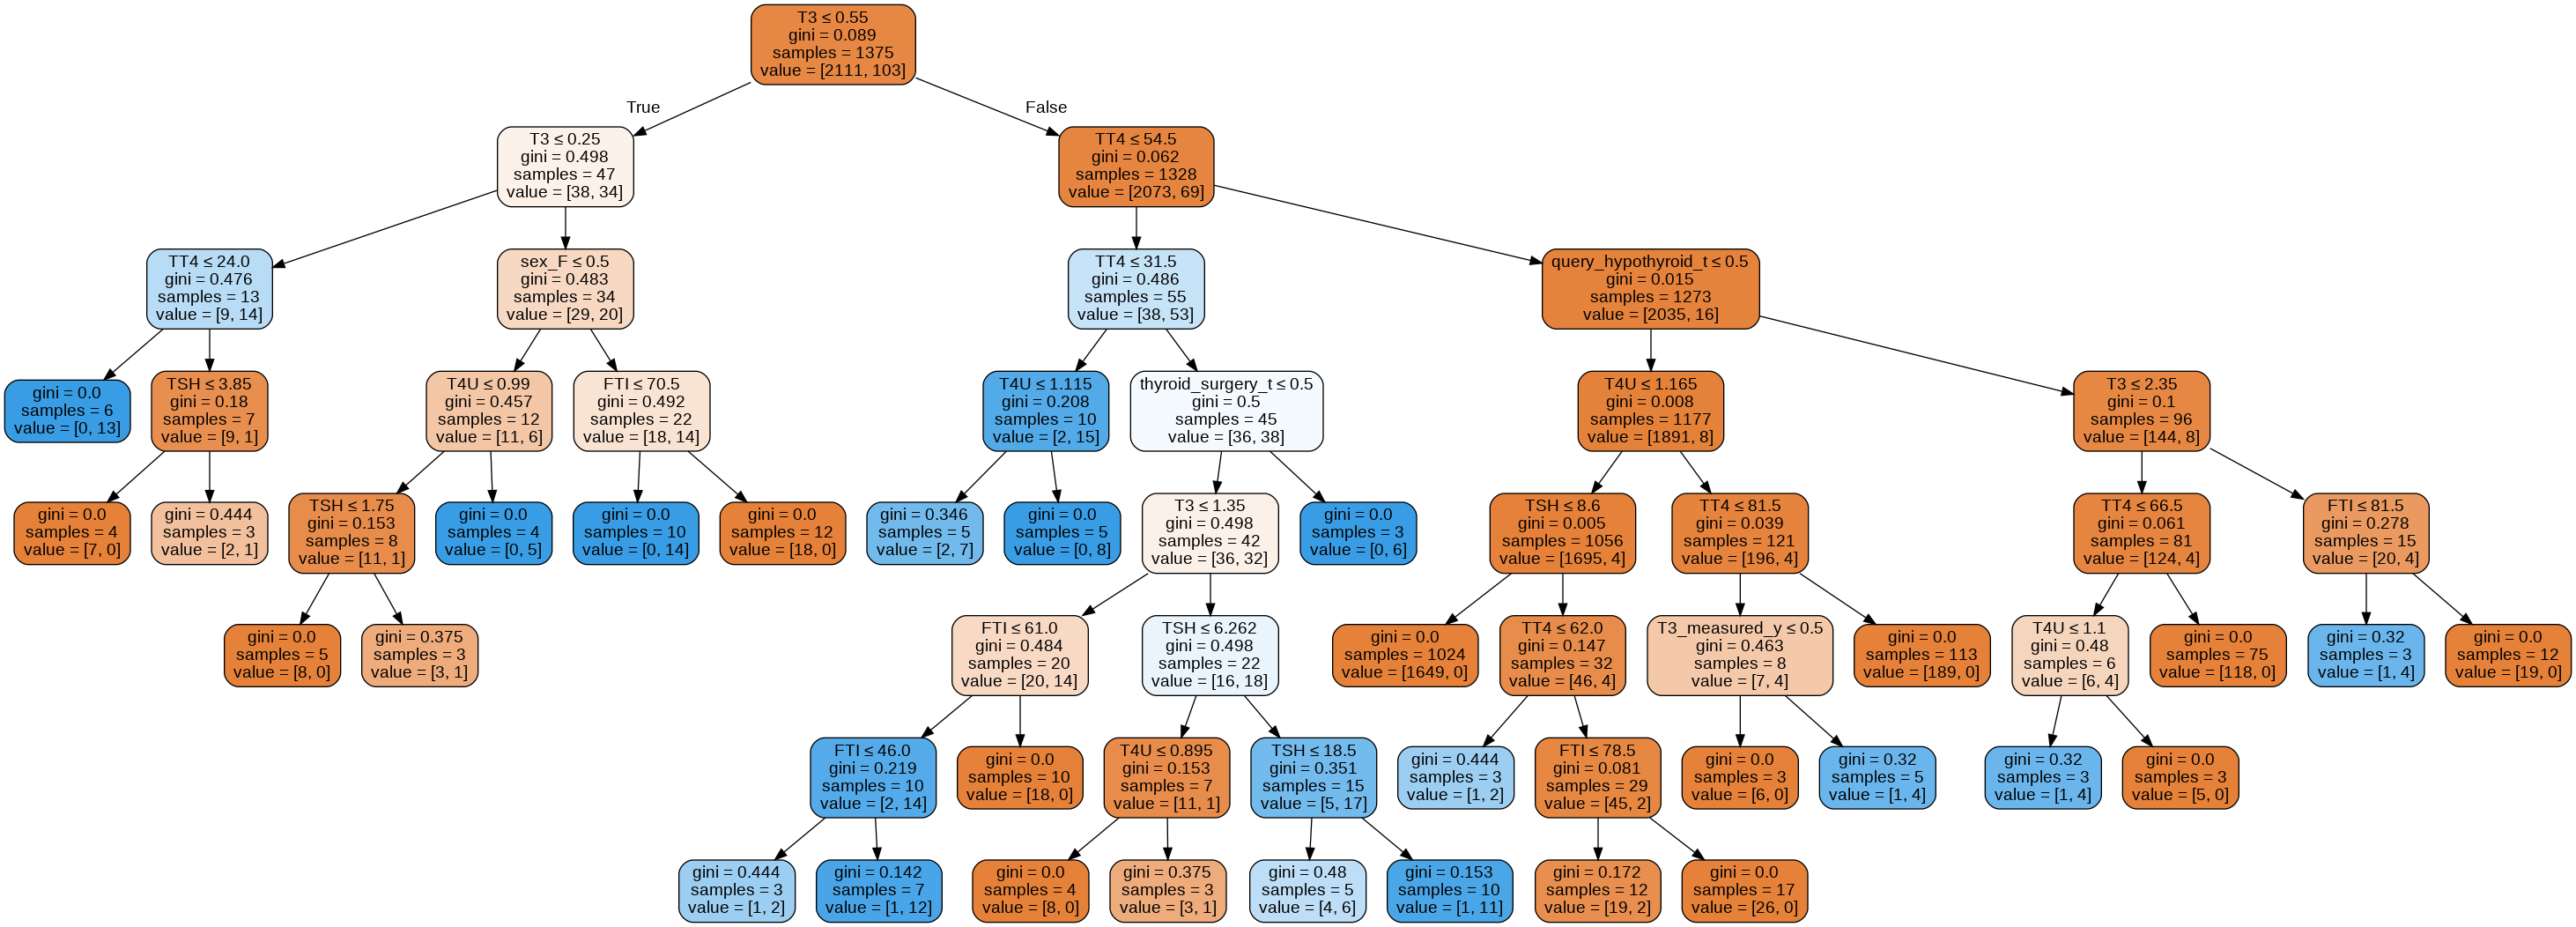

In [81]:
#Visualising the 20th tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = fore.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())


In [82]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('TSH', 0.0), ('T4U', 0.02), ('sex_F', 0.0), ('on_thyroxine_f', 0.0), ('query_on_thyroxine_f', 0.0), ('on_antithyroid_medication_f', 0.0), ('thyroid_surgery_t', 0.02), ('query_hyperthyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('pregnant_f', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_y', 0.02), ('TT4_measured_y', 0.0), ('TSH', 0.06), ('T4U_measured_y', 0.0), ('T4U', 0.04), ('FTI_measured_y', 0.0), ('FTI', 0.2), ('T3', 0.17), ('TT4', 0.46)]

Variable: TT4                  Importance: 0.46
Variable: FTI                  Importance: 0.2
Variable: T3                   Importance: 0.17
Variable: TSH                  Importance: 0.06
Variable: T4U                  Importance: 0.04
Variable: T4U                  Importance: 0.02
Variable: thyroid_surgery_t    Importance: 0.02
Variable: T3_measured_y        Importance: 0.02
Variable: TSH                  Importance: 0.0
Variable: sex_F               

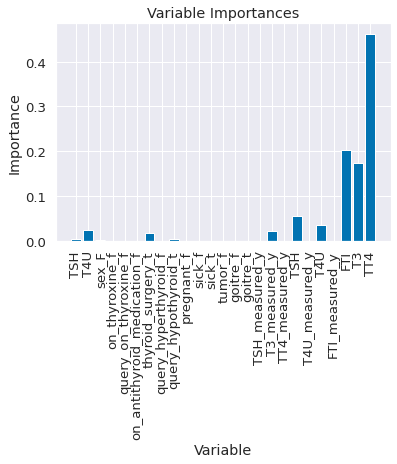

In [83]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The most important features in our case are FTI, TSH, TT4, T3,thyroid_surgery_t, T3_measured_y and T4U.

In [84]:
#Challenging the sollution by only using the important features in the model
y = data_train['status_hypothyroid'].values


test_features = ['TSH','T4U',
      'thyroid_surgery_t',
       'T3_measured_y',
     'FTI', 'T3', 'TT4']


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data_train[test_features].values

In [ ]:
#fitting the best parameters
from sklearn.ensemble import RandomForestClassifier

fore = RandomForestClassifier(min_samples_leaf = 3,  min_samples_split = 3, max_depth=7)
fore = fore.fit(X_train, y_train)

# Getting the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, fore.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

###**Ada Boosted Trees**

In [85]:

from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3), 
                          n_estimators=300, random_state=20)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

# Obtaining the accuracy score

print('Prediction accuracy:', accuracy_score(y_train, ada_boost.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 1.0
Test accuracy: 0.9894625922023182


In [86]:
# Hyperparameter tuning using grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [3,4,5,6],
              'max_depth': [3,4,5,6, 7, 8, 9, 10],
              'min_samples_leaf': [2,3,4,5]}

search = GridSearchCV(estimator = tree, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [87]:
# Checking for the best parameters and accuracy score

search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9873608903020668


In [88]:
# Fitting the model with the new parameters
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3)

tree.fit(X_train, y_train)

# Making predictions

y_pred = tree.predict(X_test)

y_pred_train = tree.predict(X_train)

# Checking the accuracy

print('Prediction accuracy:', accuracy_score(y_train, tree.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 0.995483288166215
Test accuracy: 0.9884088514225501


###**Gradient boosted Trees**

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.4, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))


Prediction accuracy: 1.0
Test accuracy: 0.9884088514225501


In [90]:
# Hyper parameter tuning

param_grid = {'learning_rate': np.arange(0.1,1,0.1),
              'max_depth': [1,2,3,4,5]}

search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 10, scoring = 'accuracy')

In [91]:
# Getting the best parameters and best score

search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.4, 'max_depth': 4}
0.9941319147201501


In [92]:
gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

# Obtaining the accuracy

print('Prediction accuracy:', accuracy_score(y_train, gbr.predict(X_train)))
print('Test accuracy:', accuracy_score(y_test, y_pred))

Prediction accuracy: 1.0
Test accuracy: 0.9894625922023182


In [93]:
# Standardizing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##**Support Vector Machine**

In [94]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
y = data_train['status_hypothyroid'].values
# Selecting the independent variables and the target variable
X = data_train[['FTI', 'TSH']].values

# Applying the reduction algorithm: PCA

pca = RandomizedPCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape

(3163, 2)

In [95]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Fitting the polynomial function**

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma=10)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Status with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

**Radial basis function(RBF)**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

**Sigmoid function**

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))